# Importing Libararies

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import joblib
import warnings
warnings.filterwarnings('ignore')

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [53]:
from sklearn.metrics import (
accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay
)

# Loading the Dataset

In [54]:
df = pd.read_csv("heart_disease_data.csv")

In [55]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Checking Basic Information

In [56]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


# Basic Information of the Data

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [58]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [59]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [60]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Checking for Unrealistic values

In [61]:
expected_ranges = {
    'age': (0, 120),
    'sex': (0, 1),
    'cp': (0, 3),
    'trestbps': (70, 250),
    'chol': (80, 600),
    'fbs': (0, 1),
    'restecg': (0, 2),
    'thalach': (50, 250),
    'exang': (0, 1),
    'oldpeak': (0, 7),
    'slope': (0, 2),
    'ca': (0, 4),
    'thal': (0, 3),
}

In [62]:
print("Checking for Unrealistic Values:\n")

for col, (min_val, max_val) in expected_ranges.items():
    if col in df.columns:
        invalid = df[(df[col]<min_val) | (df[col]>max_val)]
        if len(invalid)>0:
            print(f"Unrealistic values found in '{col}' : \n{invalid[[col]].head()}\n")
        else:
            print(f"{col} : OK")

Checking for Unrealistic Values:

age : OK
sex : OK
cp : OK
trestbps : OK
chol : OK
fbs : OK
restecg : OK
thalach : OK
exang : OK
oldpeak : OK
slope : OK
ca : OK
thal : OK


In [63]:
# No unrealistic values

# Split Features and Target

In [64]:
X = df.drop('target', axis=1)
y = df['target']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the Data

In [66]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Models

In [67]:
# Logisitic Regression

lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [68]:
# Decision Tree 

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [69]:
# Random Forest

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# Evaluation Models

In [70]:
def evaluate(model, X_test, y_test, scaled=False):
    if scaled:
        preds = model.predict(X_test_scaled)
        probs = model.predict_proba(X_test_scaled)[:,1]
    else:
        preds = model.predict(X_test)
        probs = model.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    roc = roc_auc_score(y_test, probs)

    print(f'Accuracy: {acc:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-score: {f1:.4f}')
    print(f'ROC-AUC: {roc:.4f}')

    return acc, precision, recall, f1, roc

# Evaluate the Model

In [71]:
print("Logistic Regression:")
evaluate(lr_model, X_test, y_test, scaled=True)

Logistic Regression:
Accuracy: 0.8525
Precision: 0.8710
Recall: 0.8438
F1-score: 0.8571
ROC-AUC: 0.9267


(0.8524590163934426,
 0.8709677419354839,
 0.84375,
 0.8571428571428571,
 0.9267241379310345)

In [72]:
print("Decision Tree")
evaluate(tree_model, X_test, y_test)

Decision Tree
Accuracy: 0.8525
Precision: 0.9259
Recall: 0.7812
F1-score: 0.8475
ROC-AUC: 0.8561


(0.8524590163934426,
 0.9259259259259259,
 0.78125,
 0.847457627118644,
 0.8561422413793104)

In [73]:
print("Random Forest")
evaluate(rf_model, X_test, y_test)

Random Forest
Accuracy: 0.8361
Precision: 0.8438
Recall: 0.8438
F1-score: 0.8438
ROC-AUC: 0.9327


(0.8360655737704918, 0.84375, 0.84375, 0.84375, 0.9326508620689654)

# Confusion Matrix

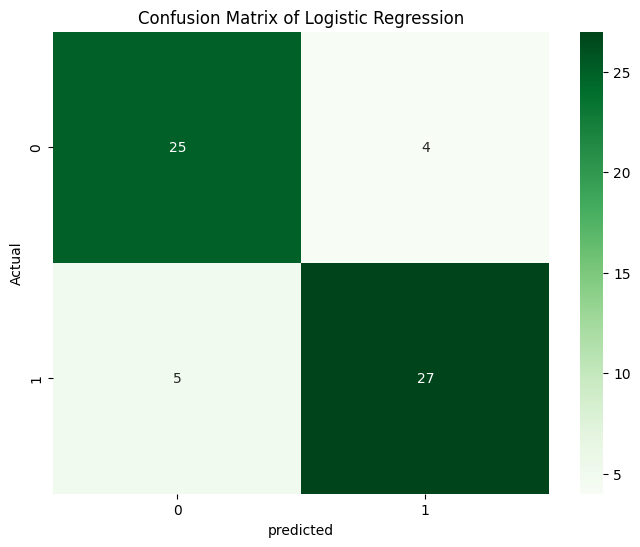

In [74]:
# Logistic Regression

lr_preds = lr_model.predict(X_test_scaled)
cm_lr = confusion_matrix(y_test, lr_preds)

plt.figure(figsize=(8,6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix of Logistic Regression')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

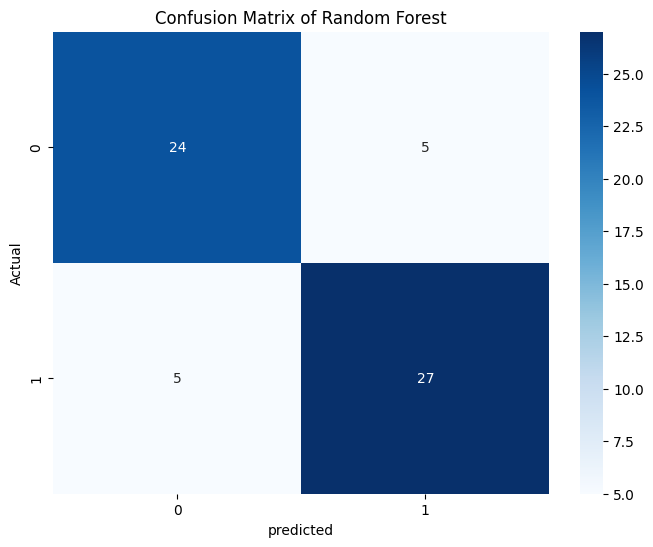

In [82]:
# Random Forest

rf_preds = rf_model.predict(X_test)
cm_rf = confusion_matrix(y_test, rf_preds)

plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Random Forest')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve Comparision

<Figure size 800x600 with 0 Axes>

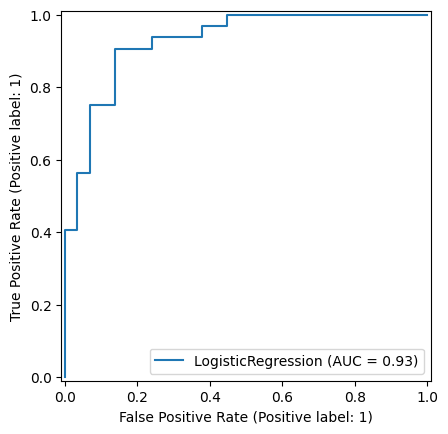

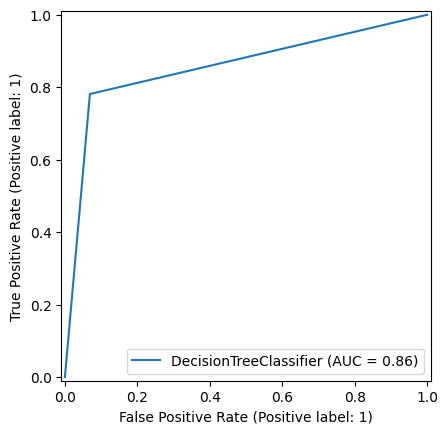

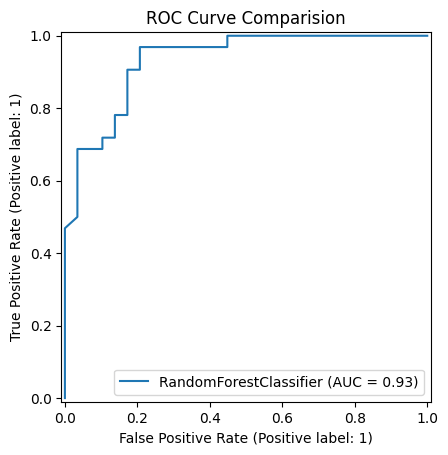

In [76]:
plt.figure(figsize=(8,6))
RocCurveDisplay.from_estimator(lr_model, X_test_scaled, y_test)
RocCurveDisplay.from_estimator(tree_model, X_test, y_test)
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)

plt.title('ROC Curve Comparision')
plt.show()

# Save the Best Model

In [77]:
trained_model1 = {
    'model_name': 'Logistic Regression',
    'model': lr_model,
    'scaler': scaler,
    'feature_columns': list(X.columns)
}

In [78]:
joblib.dump(trained_model1, 'LogisticRegression_HeartDiseaseModel.pkl')
print('Model Saved as:\nLogisticRegression_HeartDiseaseModel.pkl')

Model Saved as:
LogisticRegression_HeartDiseaseModel.pkl


In [79]:
trained_model2 = {
    'model_name': 'Random Forest',
    'model': rf_model,
    'scaler': scaler,
    'feature_columns': list(X.columns)
}

In [80]:
joblib.dump(trained_model2, 'RandomForest_HeartDiseaseModel.pkl')
print('Model Saved as:\nRandomForest_HeartDiseaseModel.pkl')

Model Saved as:
RandomForest_HeartDiseaseModel.pkl


# Test Prediction Example

In [87]:
sample1 = X_test.iloc[0]
sample_scaled = scaler.transform([sample1])

prediction1 = lr_model.predict([sample1])
prob1 = lr_model.predict_proba([sample1])[0][1]


print('Example Prediction of Logistic Regression')
print('Predicted Class:', prediction1[0])
print('Probability of Heart Disease:', prob1)

Example Prediction of Logistic Regression
Predicted Class: 0
Probability of Heart Disease: 1.881971999152999e-23


In [88]:
sample2 = X_test.iloc[0]
sample_scaled = scaler.transform([sample2])

prediction2 = rf_model.predict([sample2])
prob2 = rf_model.predict_proba([sample2])[0][1]


print('Example Prediction of Random Forest')
print('Predicted Class:', prediction2[0])
print('Probability of Heart Disease:', prob2)

Example Prediction of Random Forest
Predicted Class: 0
Probability of Heart Disease: 0.075
